The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.


In [1]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier,MLPRegressor

from keras.models import Sequential
from keras.layers import Dense,Activation,Layer,Lambda
 
    

In [2]:
df=pd.read_csv("C:\\Users\\PRIYANKA\\Downloads\\gas_turbines.csv")
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [5]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
df.shape

(15039, 11)

Text(0.5, 1.0, 'HEATMAP OF CORRELATION MATRIX')

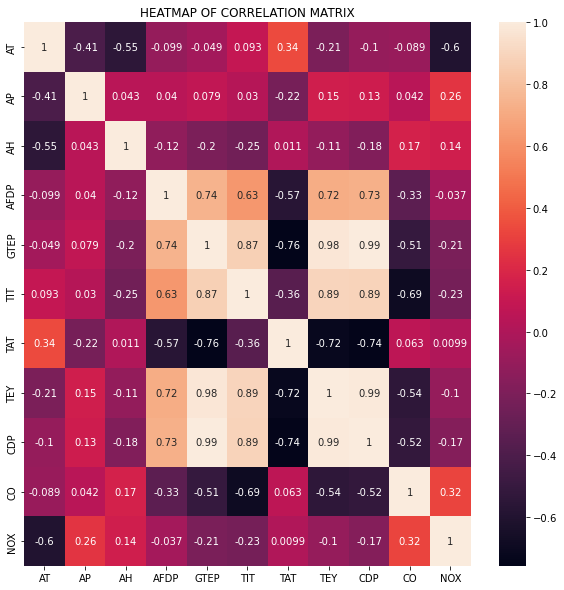

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.title("HEATMAP OF CORRELATION MATRIX")

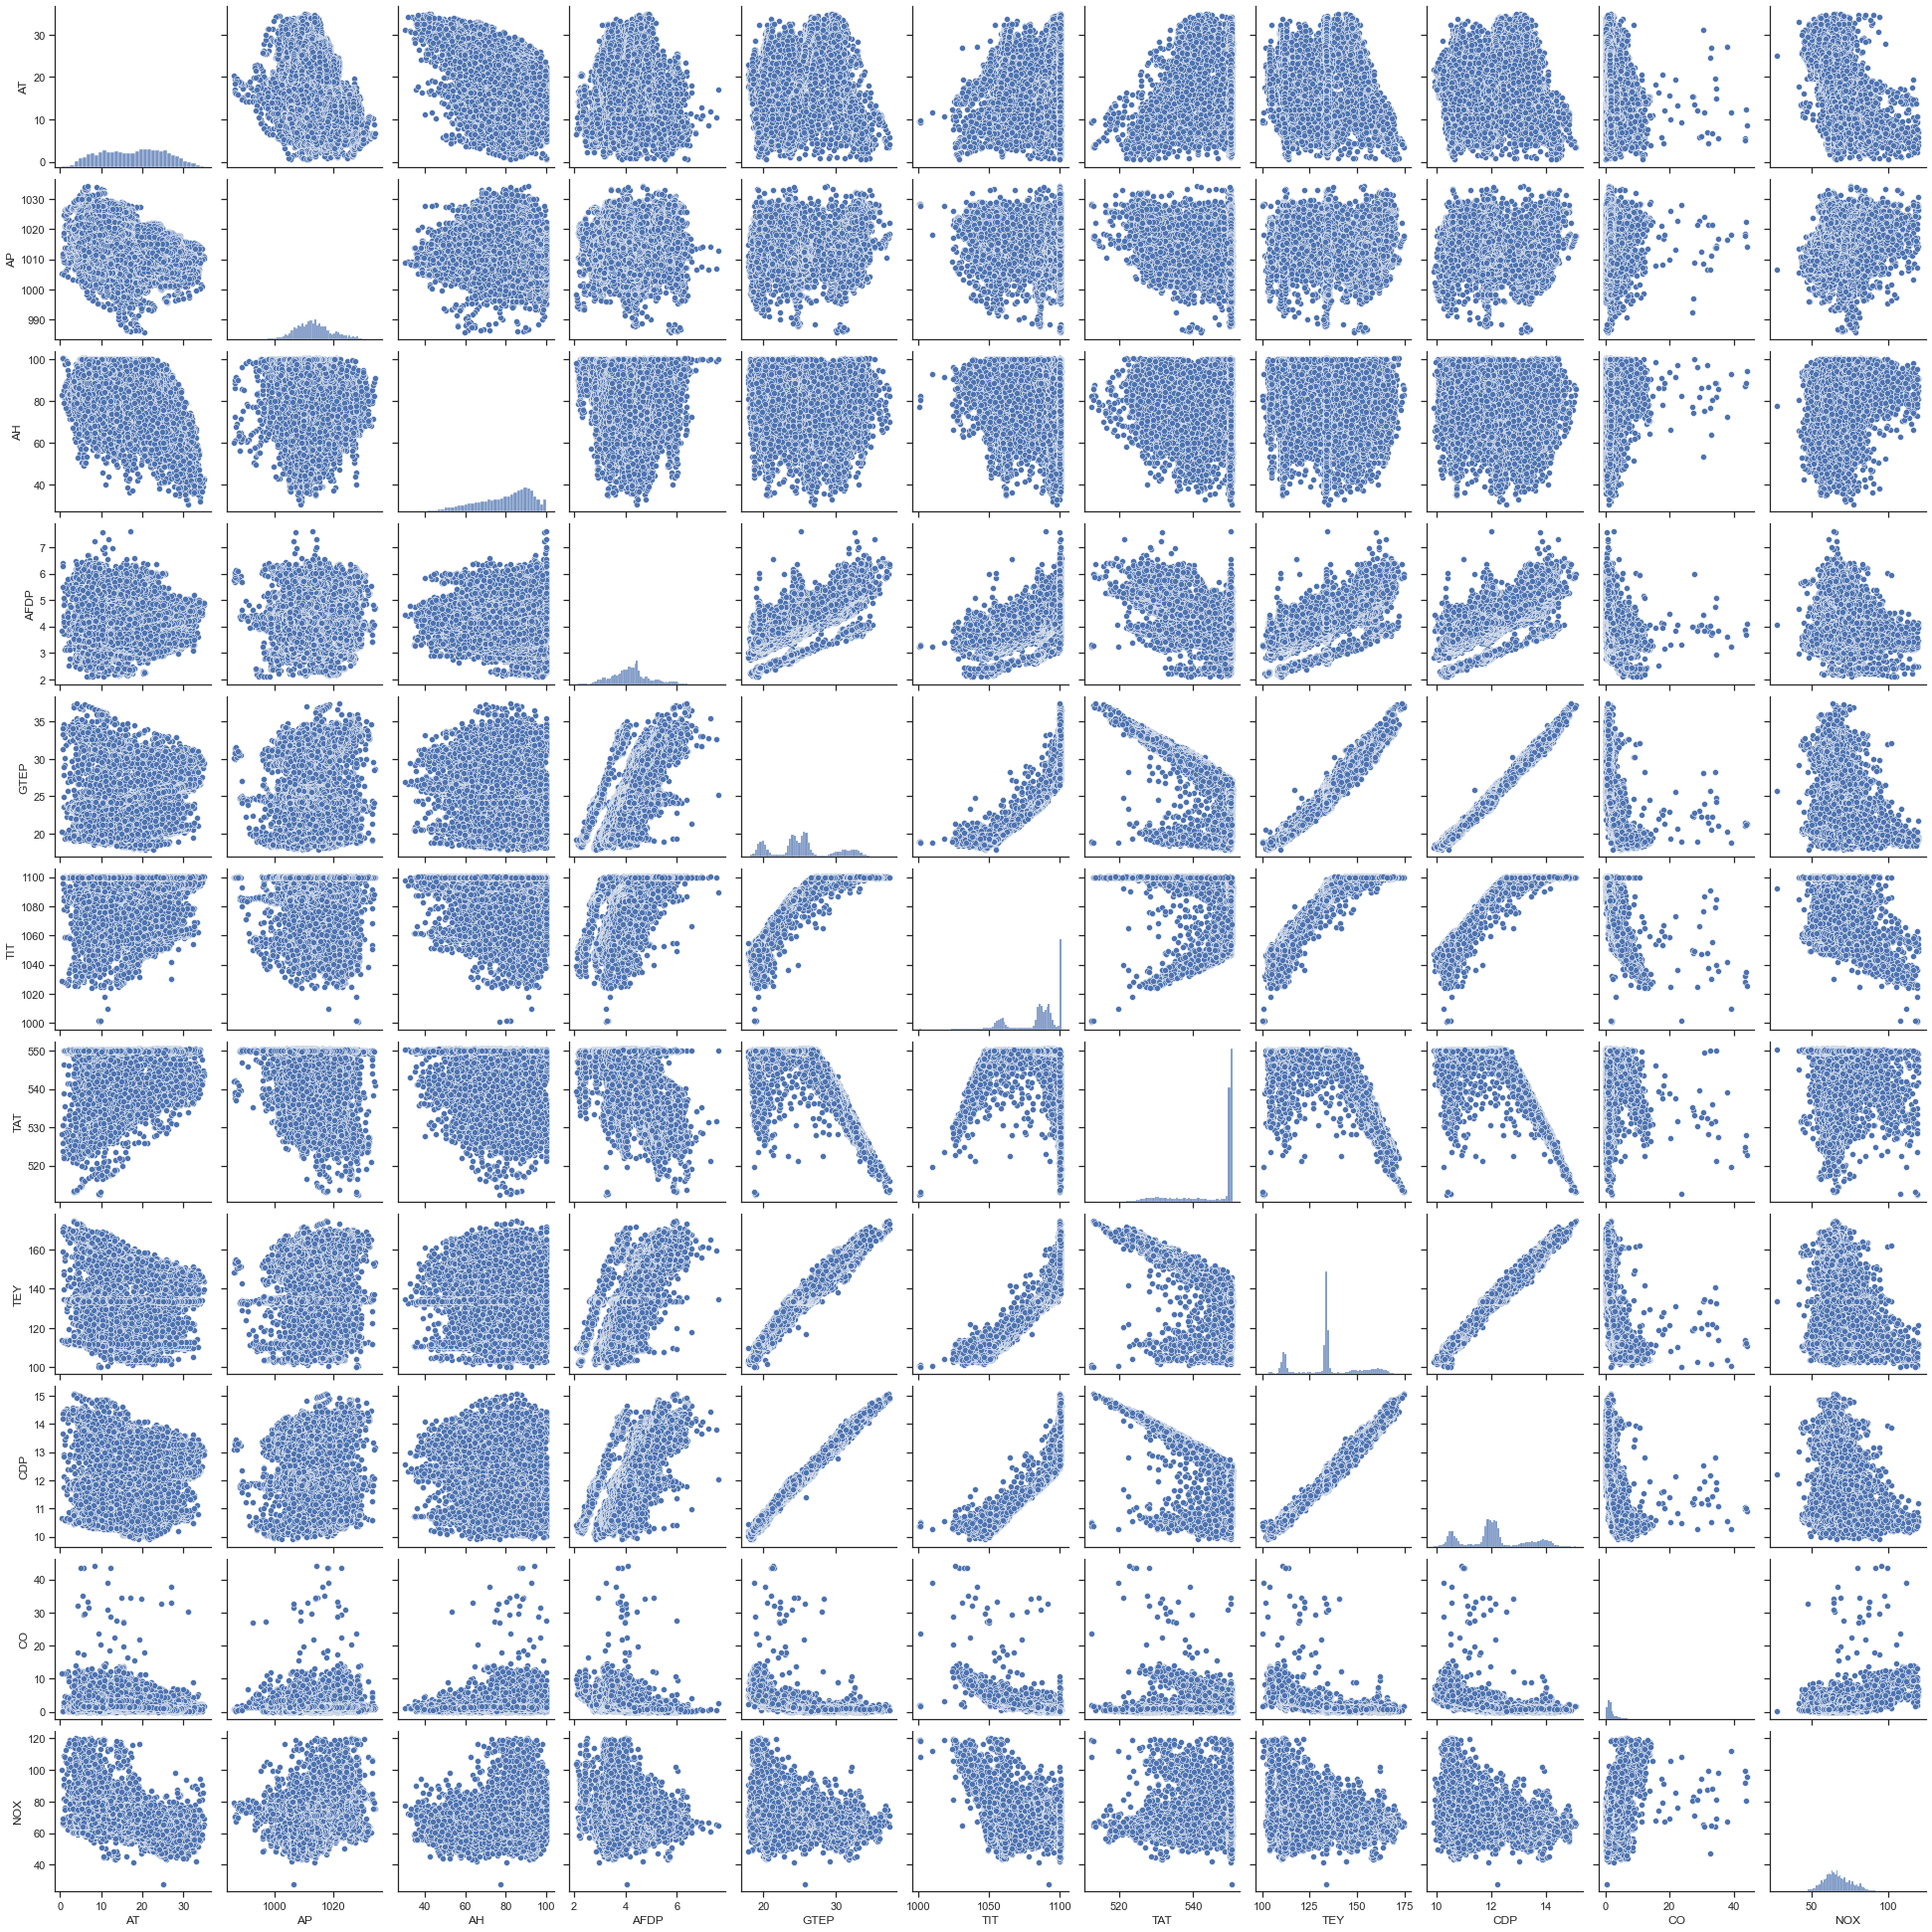

In [8]:
sns.set(style="ticks")
sns.pairplot(df,diag_kind='hist')

In [9]:
x=df.drop(['TEY'],axis=1)
y=df['TEY']

In [10]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [11]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
# LINEAR REGRESSION

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(X_test)
y_pred

array([133.58879352, 157.03988978, 134.41059865, ..., 132.75220036,
       134.48689382, 133.58373702])

In [16]:
#DECISION TREE REGRESSION

In [17]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor= DecisionTreeRegressor()
dt_regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [18]:
y_pred = dt_regressor.predict(X_test)
y_pred

array([134.15, 156.51, 133.75, ..., 133.33, 134.83, 134.09])

In [19]:
#FOR RANDOM FOREST REGRESSION

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor= RandomForestRegressor()
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [21]:
y_pred = rf_regressor.predict(X_test)
y_pred

array([133.9813, 156.4609, 133.826 , ..., 133.3066, 134.4566, 133.6664])

In [22]:
#PERFORMANCE EVALUATION

In [23]:
#RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.6851529809348481

In [24]:
#R-SQUARED
from sklearn.metrics import r2_score
r_squared = r2_score(Y_test, y_pred)
r_squared

0.9981363933707879

In [25]:
#MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, y_pred)
mae

0.42528620345744667

In [26]:
#WE OBTAINED THE R-SQUARED VALUE AS 0.9981 .